In [22]:
import psycopg2
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
from scipy import stats
from sklearn.externals.six import StringIO
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
import matplotlib.pyplot as plt
def db_connection():
    conn = psycopg2.connect(
        host='',
        port=,
        user='',
        password='',
        database=''
    )
    return conn
print("Connected")

Connected


In [23]:
example_query = "select * from lac.Kmeans_FP where Active=true"
conn = db_connection()
df = pd.read_sql(example_query, conn)
df.describe()

,monetary,tranx,lengt,rec,ptsissuedpertranx,ptsredeemedpertranx,redemptiontrnx
count,1.045932e+06,1.045932e+06,1.045932e+06,1.045932e+06,1.045932e+06,831086.000000,831086.000000
mean,4.578487e+01,3.210506e+01,3.309016e+02,6.320150e+01,9.866154e+01,1343.815890,5.189059
std,2.927284e+01,3.727816e+01,8.289063e+01,7.432065e+01,7.159857e+01,1522.273676,7.384876
min,-3.425000e+00,1.000000e+00,1.800000e+01,1.800000e+01,-6.850000e+00,4.500000,1.000000
25%,3.040000e+01,7.000000e+00,3.280000e+02,2.200000e+01,6.284000e+01,471.000000,2.000000
50%,3.859720e+01,2.000000e+01,3.700000e+02,3.000000e+01,8.092525e+01,904.411700,3.000000
75%,5.187205e+01,4.500000e+01,3.790000e+02,6.600000e+01,1.113910e+02,1675.000000,6.000000
max,4.020375e+03,3.252000e+03,3.820000e+02,3.820000e+02,8.040750e+03,61076.250000,482.000000


In [24]:
ds=df.drop('lengt', axis=1)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045932 entries, 0 to 1045931
Data columns (total 8 columns):
monetary               1045932 non-null float64
tranx                  1045932 non-null int64
rec                    1045932 non-null int64
ptsissuedpertranx      1045932 non-null float64
ptsredeemedpertranx    831086 non-null float64
redemptiontrnx         831086 non-null float64
csn                    1045932 non-null object
active                 1045932 non-null bool
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 56.9+ MB


In [25]:
for i in ds.columns:
        count = ds[i].nunique()
        print('{} count: {}'.format(i, count))

monetary count: 370812
tranx count: 544
rec count: 365
ptsissuedpertranx count: 446823
ptsredeemedpertranx count: 57723
redemptiontrnx count: 200
csn count: 1045932
active count: 1


In [54]:
ds['ptsissuedpertranx'] = ds['ptsissuedpertranx'].replace(np.nan, 0.0)
ds['ptsredeemedpertranx'] = ds['ptsredeemedpertranx'].replace(np.nan, 0.0)
ds['redemptiontrnx']= ds['redemptiontrnx'].replace(np.nan, 0.0)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=ds[['monetary','tranx', 'rec','ptsissuedpertranx','ptsredeemedpertranx','redemptiontrnx']]
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans

cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled )
    cluster_errors.append( clusters.inertia_ )
    
clusters_dfclusters  = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [28]:
clusters_dfclusters [0:10]

,cluster_errors,num_clusters
0,6.275592e+06,1
1,5.021992e+06,2
2,4.216843e+06,3
3,3.483653e+06,4
4,3.043443e+06,5
5,2.748952e+06,6
6,2.468585e+06,7
7,2.286725e+06,8
8,2.151540e+06,9
9,2.022246e+06,10


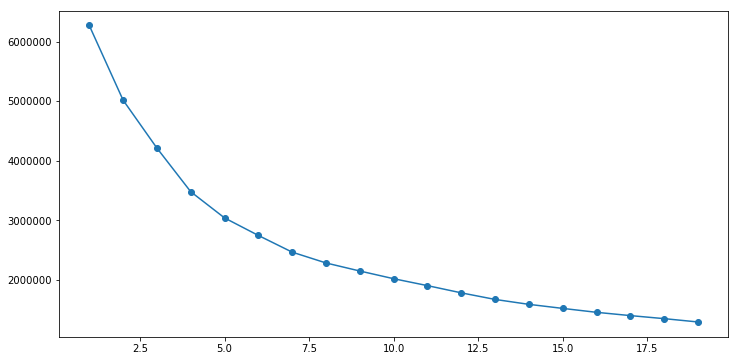

In [29]:
plt.figure(figsize=(12,6))
plt.plot( clusters_dfclusters.num_clusters, clusters_dfclusters.cluster_errors, marker = "o" )
plt.show()

In [75]:
#PCA
from sklearn.preprocessing import StandardScaler
features = ['monetary','tranx', 'rec','ptsissuedpertranx','ptsredeemedpertranx','redemptiontrnx']
# Separating out the features
x = ds.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [76]:
##PCA Projection to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [77]:
principalDf.head(100)

,principal component 1,principal component 2,principal component 3
0,-0.231274,-0.704928,0.061843
1,0.355898,-0.968340,0.284909
2,-1.304312,0.100970,-0.076539
3,-0.112939,-0.401391,-0.411807
4,0.418825,0.149360,-0.362427
5,-2.513791,1.155769,0.892163
6,0.039439,-1.239815,-0.236817
7,0.055941,-0.702306,-0.808291
8,-0.062148,0.181170,-0.621906
9,-0.763187,0.654221,0.102901


[ 35.14  63.76  79.58]


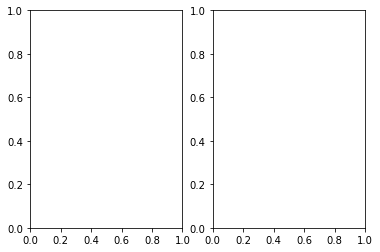

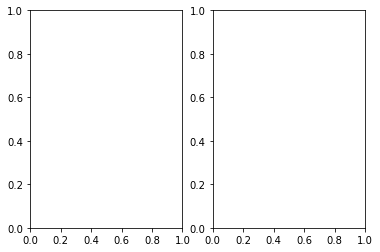

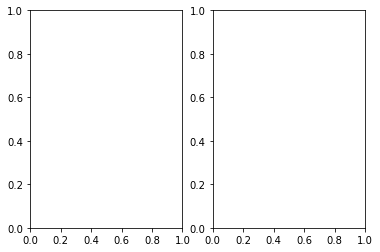

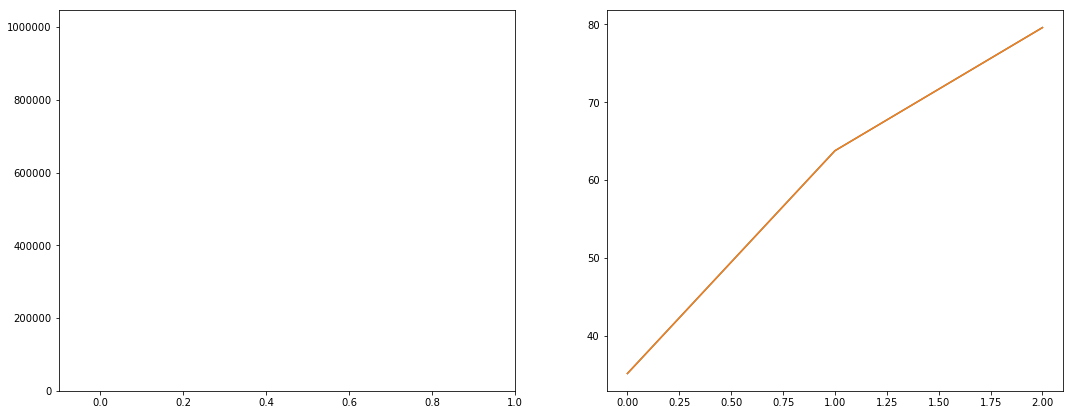

In [83]:
##how many PCA to consider for modelling purposes not related to the visulaization of the data into the clusters
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)
plt.show()

In [89]:
# Number of clusters
kmeans = KMeans(n_clusters=5)
# Fitting the input data
kmeans = kmeans.fit(X_scaled)
# Getting the cluster labels
labels = kmeans.predict(X_scaled)
# Centroid values
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.23901443 -0.28657134 -0.2428152  -0.23062129 -0.29173159 -0.19584763]
 [-0.06307813  2.03233781 -0.5401922  -0.07579899 -0.09298316  2.19654334]
 [-0.2829414  -0.74112613  2.43137317 -0.29410507 -0.51827844 -0.47048356]
 [ 3.34561445 -0.24562476  0.07388397  3.50471512  0.5152236  -0.0379549 ]
 [ 0.44603434  0.62255046 -0.46767277  0.39148995  1.47528145 -0.07008397]]


In [90]:
print(X_scaled)

[[-0.36485621  0.31908615 -0.4063677  -0.39738999 -0.36111667  0.12691875]
 [-0.13221383  0.6946413  -0.59474073 -0.20715843 -0.26297436  0.56115988]
 [-0.64247886 -0.61980171  0.38749009 -0.5928954  -0.46888078 -0.45206942]
 ..., 
 [-0.44984629 -0.70027781  0.85842267 -0.46688443  0.79349878 -0.45206942]
 [-0.35866617 -0.67345245 -0.46018856 -0.25385772 -0.73059361 -0.59681647]
 [-0.45155436 -0.78075392 -0.11035293 -0.46828111 -0.70493549 -0.45206942]]


In [156]:
def set_cluster(self, clusterNumber):
        self.clusterNumber = clusterNumber
    
def get_cluster(self):
        return self.clusterNumber

In [170]:
def get_distance(dataPointa, dataPointb,dataPointc, dataPointd, dataPointe,dataPointf,\
                 centroida, centroidb,centroidc, centroidd,centroide,centroidf):
    # Calculate Euclidean distance.
    return math.sqrt(math.pow((centroida - dataPointa), 2) +\
                     math.pow((centroidb - dataPointb), 2)+\
                     math.pow((centroidc - dataPointc), 2)+\
                     math.pow((centroidd - dataPointd), 2)+\
                     math.pow((centroide - dataPointe), 2)+\
                     math.pow((centroidf - dataPointf), 2))

In [173]:
BIG_NUMBER = math.pow(10, 10)
def update_clusters():
    isStillMoving = 0
    
    for i in range(len(X_scaled)):
        bestMinimum = BIG_NUMBER
        currentCluster = 0
        
        for j in range(len(centroids)):
            distance = get_distance(X_scaled[[i,0]], X_scaled[[i,1]],X_scaled[[i,2]],X_scaled[[i,3]],X_scaled[[i,4]],X_scaled[[i,5]],\
                                    centroids[[j,0]], centroids[[j,1]],centroids[[j,2]],centroids[[j,3]],centroids[[j,4]],centroids[[j,5]])
            if(distance < bestMinimum):
                bestMinimum = distance
                currentCluster = j
        
        X_scaled[i].set_cluster(currentCluster)
        
        if(X_scaled[i].get_cluster() is None or X_scaled[i].get_cluster() != currentCluster):
            X_scaled[i].set_cluster(currentCluster)
            isStillMoving = 1
    
    return isStillMoving  

def perform_kmeans():
    isStillMoving = 1
    while(isStillMoving):
        isStillMoving = update_clusters()
  
    return          

In [154]:
for i in range(5):
    print(centroids[1,0])

-0.0630781316401
-0.0630781316401
-0.0630781316401
-0.0630781316401
-0.0630781316401


In [121]:
len()

1045932

In [ ]:
def assignment(X_scaled, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

In [175]:
import matplotlib.pyplot as plt
dist = plt.mlab.dist(X_scaled, centroids)

ValueError: operands could not be broadcast together with shapes (1045932,6) (5,6) 